### Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

### Importing the Packages

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Import the matplotlib, seaborn, numpy and pandas packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Reading the CSV file

In [2]:
# importing the csv file
share_bike = pd.read_csv('day.csv')
share_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Understanding the data

##### Shape of dataframe

In [3]:
share_bike.shape

(730, 16)

##### Information on dataframe

In [4]:
share_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.3+ KB


- We can infer from the above that there are 16 columns in the dataframe. The columns dteday, season, yr, mnth, holiday, weekday, workingday, weathersit are categorical variables. But its not object data type, so it needs to be converted.
- The columns instant, dteday are not that informative. So, it can be dropped.
- The columns casual and registered are insignificant as total of casual and registered is equal to cnt. So, it can be dropped.

### Data Preparation

##### Drop the non-informative columns

In [5]:
share_bike.drop(['instant','dteday','casual','registered'], axis=1, inplace=True)
share_bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


##### Handling categorical variables and converting

In [6]:
def seasons(x):
    if x == 1:
        return 'spring'
    elif x == 2:
        return 'summer'
    elif x == 3:
        return 'fall'
    else:
        return 'winter'

def weather(x):
    if x == 1:
        return 'clear'
    elif x == 2:
        return 'cloudy'
    elif x == 3:
        return 'light rain'
    else:
        return 'heavy rain'

def year(x):
    if x == 0:
        return '2018'
    else:
        return '2019'

def month(x):
    if x == 1:
        return 'jan'
    elif x == 2:
        return 'feb'
    elif x == 3:
        return 'mar'
    elif x == 4:
        return 'apr'
    elif x == 5:
        return 'may'
    elif x == 6:
        return 'jun'
    elif x == 7:
        return 'jul'
    elif x == 8:
        return 'aug'
    elif x == 9:
        return 'sep'
    elif x == 10:
        return 'oct'
    elif x == 11:
        return 'nov'
    else:
        return 'dec'

def day(x):
    if x == 0:
        return 'sun'
    elif x == 1:
        return 'mon'
    elif x == 2:
        return 'tue'
    elif x == 3:
        return 'wed'
    elif x == 4:
        return 'thu'
    elif x == 5:
        return 'fri'
    else:
        return 'sat'

def working(x):
    if x == 1:
        return 'weekendHoliday'
    else:
        return 'working'
    
def holiday(x):
    if x == 1:
        return 'Holiday'
    else:
        return 'NoHoliday'

In [7]:
share_bike['season'] = share_bike['season'].apply(seasons)
share_bike['weathersit'] = share_bike['weathersit'].apply(weather)
share_bike['yr'] = share_bike['yr'].apply(year)
share_bike['mnth'] = share_bike['mnth'].apply(month)
share_bike['weekday'] = share_bike['weekday'].apply(day)
share_bike['workingday'] = share_bike['workingday'].apply(working)
share_bike['holiday'] = share_bike['holiday'].apply(holiday)

share_bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,jan,NoHoliday,sat,working,cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,jan,NoHoliday,sun,working,cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,jan,NoHoliday,mon,weekendHoliday,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,jan,NoHoliday,tue,weekendHoliday,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,jan,NoHoliday,wed,weekendHoliday,clear,9.305237,11.46350,43.6957,12.522300,1600


##### Information of modified dataframe

In [8]:
share_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
season        730 non-null object
yr            730 non-null object
mnth          730 non-null object
holiday       730 non-null object
weekday       730 non-null object
workingday    730 non-null object
weathersit    730 non-null object
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
dtypes: float64(4), int64(1), object(7)
memory usage: 68.5+ KB


##### Description of numerical variables of modified dataframe

In [9]:
share_bike.describe()

,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,4508.006849
std,7.506729,8.150308,14.237589,5.195841,1936.011647
min,2.424346,3.953480,0.000000,1.500244,22.000000
25%,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,26.880615,30.445775,72.989575,15.625589,5966.000000
max,35.328347,42.044800,97.250000,34.000021,8714.000000


##### Decription of categorical variables of modified dataframe

In [10]:
share_bike.describe(include='object')

,season,yr,mnth,holiday,weekday,workingday,weathersit
count,730,730,730,730,730,730,730
unique,4,2,12,2,7,2,3
top,fall,2019,oct,NoHoliday,mon,weekendHoliday,clear
freq,188,365,62,709,105,499,463


### Data Visualisation

##### Visualising Numeric Variables

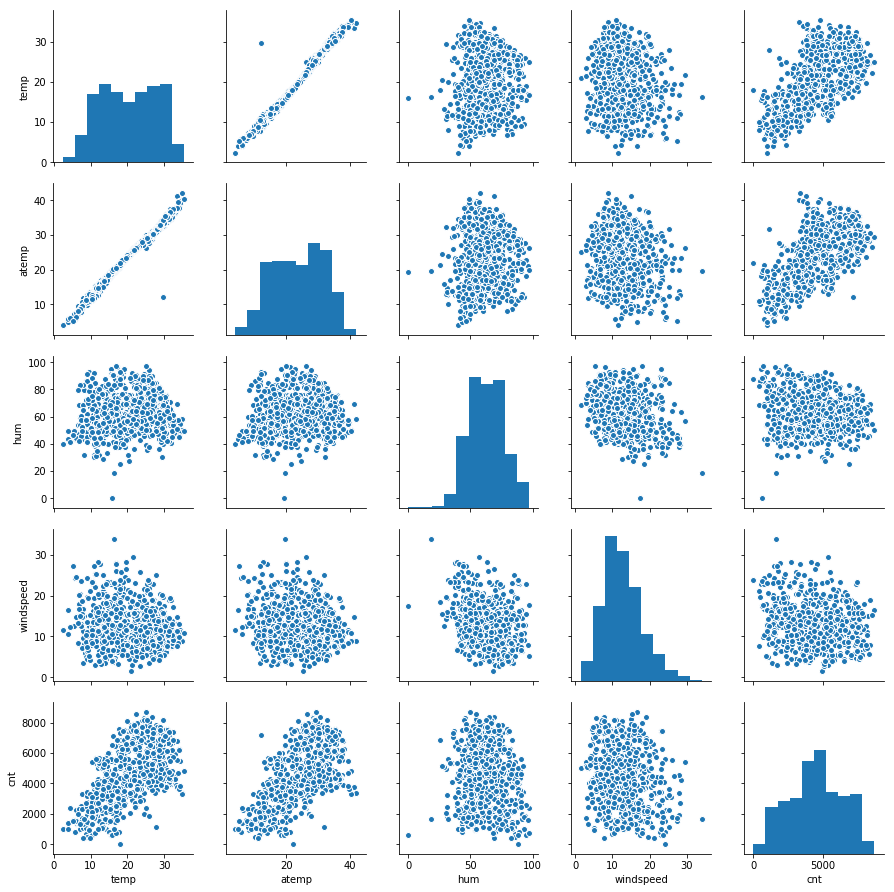

In [11]:
sns.pairplot(share_bike[['temp','atemp','hum','windspeed','cnt']])
plt.show()

- From the graph we can say that, columns temp and atemp have linear relationship and highly correlated. So we can conclude that multicollinearity exists.
- As one of the assumption of linear regression is that, there should not be multicollinearity (no relationship) between the independent varibales. So we can take any one column among them into consideration while modelling.

##### Visualising Categorical Variables

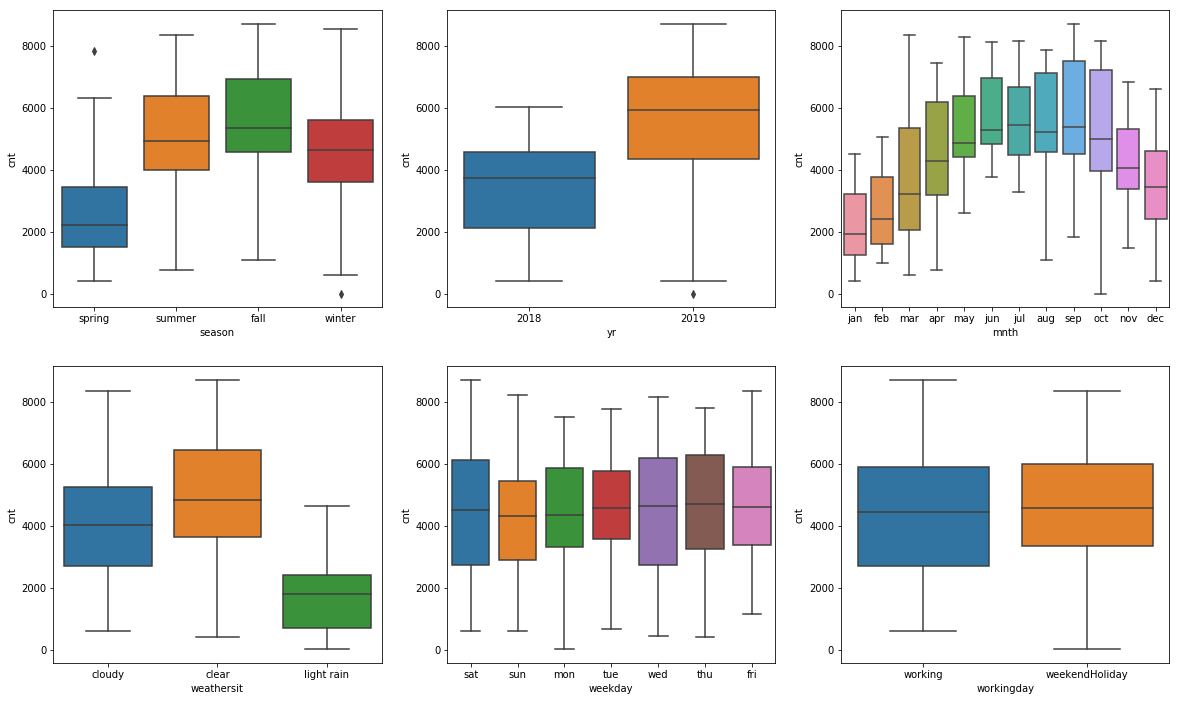

In [12]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(share_bike.season, share_bike.cnt)
plt.subplot(2,3,2)
sns.boxplot(share_bike.yr, share_bike.cnt)
plt.subplot(2,3,3)
sns.boxplot(share_bike.mnth, share_bike.cnt)
plt.subplot(2,3,4)
sns.boxplot(share_bike.weathersit, share_bike.cnt)
plt.subplot(2,3,5)
sns.boxplot(share_bike.weekday, share_bike.cnt)
plt.subplot(2,3,6)
sns.boxplot(share_bike.workingday, share_bike.cnt)
plt.show()

From above plots we say,
- More people are using share bike during `Fall` when compared to other seasons where `Spring` being the least.
- There was increasing in share bike count in `2019` when compare to 2018.
- The shared bikes are used more in months `June, July, August, September and October`.
- More people prefer share bike when the weather is `Clear`.
- The count of share bikes are more on `wednesday thrusday and saturday`.
- The median of `weekendHoliday` is little higher compared to `working`.

##### Visualising these categorical features parallely using the hue argument

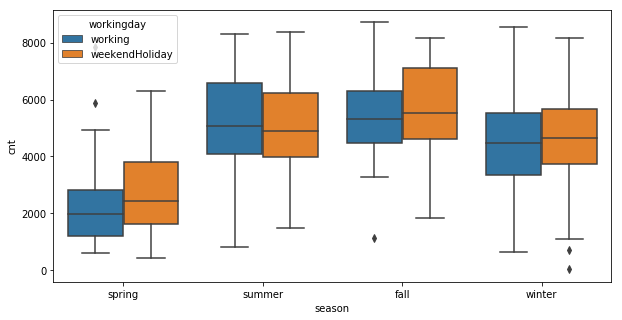

In [13]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'season', y = 'cnt', hue = 'workingday', data = share_bike)
plt.show()

From the above graph, we can say that, in all seasons share bikes are more during weekend or Holiday except Summer

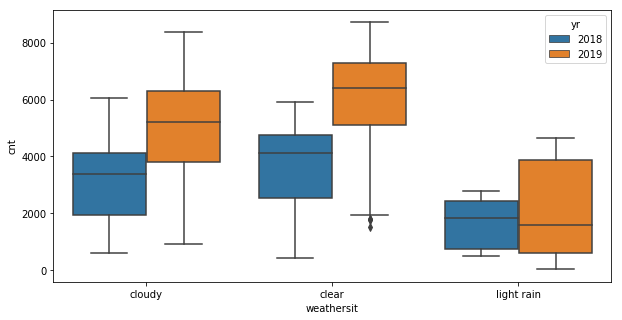

In [14]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'weathersit', y = 'cnt', hue = 'yr', data = share_bike)
plt.show()

From the graph, we can see that the share bike has steadily gone up in 2019 during clear or cloudy weather condition and also there is considerate increase during light rain as well.

### Dummy Variables

##### Dummy Variables creation for categorical variables

In [15]:
season_dummy = pd.get_dummies(share_bike.season, drop_first = True)
print(season_dummy.head())

   spring  summer  winter
0       1       0       0
1       1       0       0
2       1       0       0
3       1       0       0
4       1       0       0


Dropped the fall column, as the season can be identified with just the remaining columns where —
- 000 -> fall

In [16]:
yr_dummy = pd.get_dummies(share_bike.yr, drop_first = True)
print(yr_dummy.head())

   2019
0     0
1     0
2     0
3     0
4     0


Dropped the 2018 column, as the year can be identified with just the remaining columns where —
- 0 -> 2018

In [17]:
month_dummy = pd.get_dummies(share_bike.mnth, drop_first = True)
print(month_dummy.head())

   aug  dec  feb  jan  jul  jun  mar  may  nov  oct  sep
0    0    0    0    1    0    0    0    0    0    0    0
1    0    0    0    1    0    0    0    0    0    0    0
2    0    0    0    1    0    0    0    0    0    0    0
3    0    0    0    1    0    0    0    0    0    0    0
4    0    0    0    1    0    0    0    0    0    0    0


Dropped the apr column, as the month can be identified with just the remaining columns where —
- 00000000000 -> apr

In [18]:
day_dummy = pd.get_dummies(share_bike.weekday, drop_first = True)
print(day_dummy.head())

   mon  sat  sun  thu  tue  wed
0    0    1    0    0    0    0
1    0    0    1    0    0    0
2    1    0    0    0    0    0
3    0    0    0    0    1    0
4    0    0    0    0    0    1


Dropped the fri column, as the weekday can be identified with just the remaining columns where —
- 000000 -> fri

In [19]:
working_dummy = pd.get_dummies(share_bike.workingday, drop_first = True)
print(working_dummy.head())

   working
0        1
1        1
2        0
3        0
4        0


Dropped the weekendHoliday column, as the workingday can be identified with just the remaining columns where —
- 0 -> weekendHoliday 

In [20]:
holiday_dummy = pd.get_dummies(share_bike.holiday, drop_first = True)
print(holiday_dummy.head())

   NoHoliday
0          1
1          1
2          1
3          1
4          1


Dropped the Holiday column, as the holiday can be identified with just the remaining columns where —
- 0 -> Holiday

In [21]:
weather_dummy = pd.get_dummies(share_bike.weathersit, drop_first = True)
print(weather_dummy.head())#clear

   cloudy  light rain
0       1           0
1       1           0
2       0           0
3       0           0
4       0           0


Dropped the clear column, as the weather can be identified with just the remaining columns where —
- 0 -> clear

##### Dropping the categorical columns as the dummy variables for them have been created

In [22]:
share_bike.drop(['season','yr','mnth','holiday','weekday','workingday','weathersit'], axis=1, inplace=True)
share_bike = pd.concat([share_bike,season_dummy,yr_dummy,month_dummy,holiday_dummy,day_dummy,working_dummy,weather_dummy], 
                       axis=1)
share_bike.head()

,temp,atemp,hum,windspeed,cnt,spring,summer,winter,2019,aug,...,NoHoliday,mon,sat,sun,thu,tue,wed,working,cloudy,light rain
0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,...,1,0,1,0,0,0,0,1,1,0
1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,...,1,0,0,1,0,0,0,1,1,0
2,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
3,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [23]:
share_bike.shape

(730, 30)

### Data Modelling and Evaluation

##### Splitting the Data into Training and Testing Sets

In [24]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(share_bike, train_size=0.7, test_size=0.3, random_state=100)

##### Rescaling the Features

In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [26]:
num_vars = ['temp','atemp','hum','windspeed']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [27]:
df_train.head()

,temp,atemp,hum,windspeed,cnt,spring,summer,winter,2019,aug,...,NoHoliday,mon,sat,sun,thu,tue,wed,working,cloudy,light rain
653,0.509887,0.501133,0.575354,0.300794,7534,0,0,1,1,0,...,1,0,0,0,0,1,0,0,0,0
576,0.815169,0.766351,0.725633,0.264686,7216,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
426,0.442393,0.438975,0.640189,0.255342,4066,1,0,0,1,0,...,1,0,1,0,0,0,0,1,1,0
728,0.245101,0.200348,0.498067,0.663106,1796,1,0,0,1,0,...,1,0,0,1,0,0,0,1,0,0
482,0.395666,0.391735,0.504508,0.188475,4220,0,1,0,1,0,...,1,0,1,0,0,0,0,1,1,0


In [28]:
df_train.describe()

,temp,atemp,hum,windspeed,cnt,spring,summer,winter,2019,aug,...,NoHoliday,mon,sat,sun,thu,tue,wed,working,cloudy,light rain
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537262,0.512989,0.650369,0.320768,4486.382353,0.243137,0.245098,0.24902,0.507843,0.096078,...,0.974510,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.323529,0.343137,0.029412
std,0.225844,0.212385,0.145882,0.169797,1952.158739,0.429398,0.430568,0.43287,0.500429,0.294988,...,0.157763,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.468282,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,3120.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.540519,0.526811,0.653714,0.296763,4530.000000,0.000000,0.000000,0.00000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.735215,0.688457,0.754830,0.414447,5973.500000,0.000000,0.000000,0.00000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,8714.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### The correlation matrix to see which variables are highly correlated with target variable and with each other

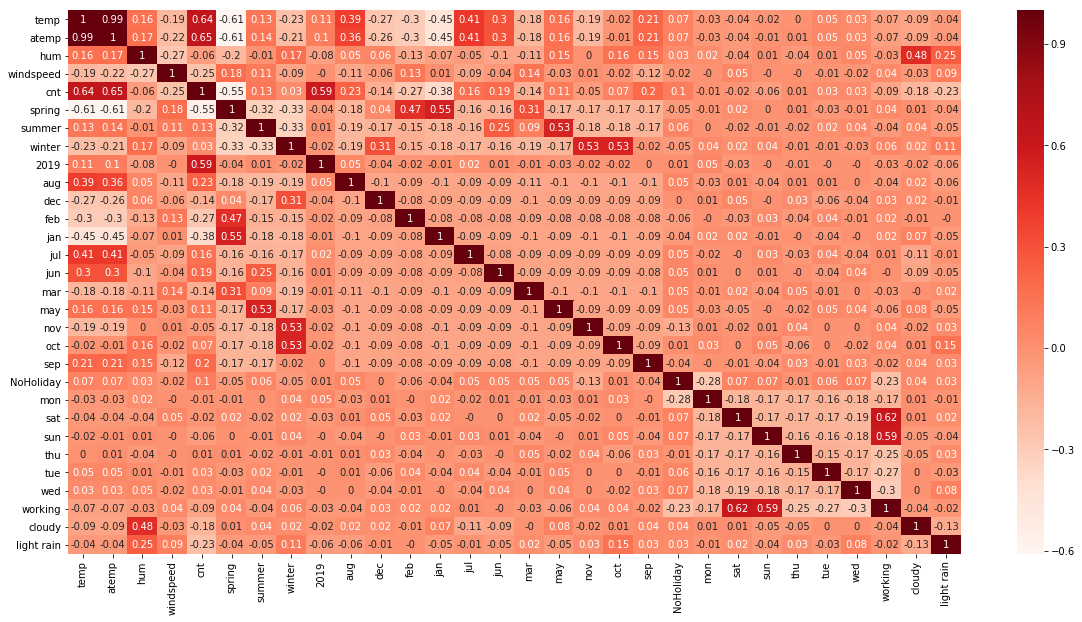

In [29]:
plt.figure(figsize = (20, 10))
sns.heatmap(round(df_train.corr(),2), annot = True, cmap='Reds')
plt.show()

##### Dividing into X and Y sets for the model building

In [30]:
y_train = df_train.pop('cnt')
X_train = df_train

##### Model Creation using RFE for feature selection

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

lm = LinearRegression()
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('2019', True, 1),
 ('aug', False, 7),
 ('dec', False, 3),
 ('feb', False, 4),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', False, 14),
 ('mar', False, 15),
 ('may', False, 6),
 ('nov', False, 2),
 ('oct', False, 11),
 ('sep', True, 1),
 ('NoHoliday', True, 1),
 ('mon', False, 9),
 ('sat', True, 1),
 ('sun', False, 8),
 ('thu', False, 12),
 ('tue', False, 10),
 ('wed', False, 13),
 ('working', True, 1),
 ('cloudy', True, 1),
 ('light rain', True, 1)]

In [32]:
col_rfe = X_train.columns[rfe.support_]
col_rfe

Index(['temp', 'hum', 'windspeed', 'spring', 'summer', 'winter', '2019', 'jan',
       'jul', 'sep', 'NoHoliday', 'sat', 'working', 'cloudy', 'light rain'],
      dtype='object')

In [33]:
X_train.columns[~rfe.support_]

Index(['atemp', 'aug', 'dec', 'feb', 'jun', 'mar', 'may', 'nov', 'oct', 'mon',
       'sun', 'thu', 'tue', 'wed'],
      dtype='object')

In [34]:
X_train_rfe = X_train[col_rfe]

##### Building model using statsmodel, for the detailed statistics

In [35]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train_rfe)

In [36]:
lm_sm = sm.OLS(y_train,X_train_sm).fit()

In [37]:
print(lm_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Sun, 19 Apr 2020   Prob (F-statistic):          2.31e-191
Time:                        19:17:54   Log-Likelihood:                -4105.9
No. Observations:                 510   AIC:                             8244.
Df Residuals:                     494   BIC:                             8312.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2073.5997    379.172      5.469      0.0

- dropping 'jan' as it has higher p-value(0.48) when compared to others

In [38]:
X_train_rfe = X_train_rfe.drop(['jan'], axis=1)

#### Perform modelling again using remaining columns

In [39]:
X_train_sm = sm.add_constant(X_train_rfe)

In [40]:
lm_sm = sm.OLS(y_train,X_train_sm).fit()

In [41]:
print(lm_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Sun, 19 Apr 2020   Prob (F-statistic):          1.13e-191
Time:                        19:17:54   Log-Likelihood:                -4107.9
No. Observations:                 510   AIC:                             8246.
Df Residuals:                     495   BIC:                             8309.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1961.7168    376.040      5.217      0.0

##### Checking if any of the independent variables are correlated to each other finding VIF

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif.sort_values(by='VIF', ascending=False)

,features,VIF
1,hum,33.11
9,NoHoliday,28.33
0,temp,19.13
2,windspeed,4.96
3,spring,4.92
5,winter,3.79
4,summer,3.06
11,working,2.62
12,cloudy,2.33
6,2019,2.09


- As the VIF value of `hum` is 33.11 which is way more than expected value 5

In [43]:
X_train_rfe = X_train_rfe.drop(['hum'], axis=1)

#### Perform modelling again using remaining columns

In [44]:
X_train_sm = sm.add_constant(X_train_rfe)

In [45]:
lm_sm = sm.OLS(y_train,X_train_sm).fit()

In [46]:
print(lm_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.0
Date:                Sun, 19 Apr 2020   Prob (F-statistic):          5.73e-189
Time:                        19:17:55   Log-Likelihood:                -4117.1
No. Observations:                 510   AIC:                             8262.
Df Residuals:                     496   BIC:                             8322.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1297.8090    348.255      3.727      0.0

##### Checking if any of the independent variables are correlated to each other finding VIF

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif.sort_values(by='VIF', ascending=False)

,features,VIF
8,NoHoliday,24.18
0,temp,13.48
1,windspeed,4.78
2,spring,4.09
4,winter,3.00
3,summer,2.82
10,working,2.54
5,2019,2.07
9,sat,2.02
6,jul,1.60


- As the VIF value of `NoHoliday` is 24.18 which is way more than expected value 5

In [48]:
X_train_rfe = X_train_rfe.drop(['NoHoliday'], axis=1)

#### Perform modelling again using remaining columns

In [49]:
X_train_sm = sm.add_constant(X_train_rfe)

In [50]:
lm_sm = sm.OLS(y_train,X_train_sm).fit()

In [51]:
print(lm_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.1
Date:                Sun, 19 Apr 2020   Prob (F-statistic):          3.28e-189
Time:                        19:17:55   Log-Likelihood:                -4119.4
No. Observations:                 510   AIC:                             8265.
Df Residuals:                     497   BIC:                             8320.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1795.3045    254.554      7.053      0.0

##### Checking if any of the independent variables are correlated to each other finding VIF

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif.sort_values(by='VIF', ascending=False)

,features,VIF
0,temp,5.18
1,windspeed,4.62
9,working,2.42
3,summer,2.23
2,spring,2.13
5,2019,2.07
8,sat,1.93
4,winter,1.84
6,jul,1.59
10,cloudy,1.55


##### The final model that can be used for further prediction
- Freezing on this though temp VIF value 5.18 is slightly more because when temp column was removed r2 and adjusted r2 value decreased. Even the p-value of column jul increased to almost 0.6

### Residual Analysis of the train data
To check if the error terms are also normally distributed (which is one of the major assumptions of linear regression)

In [53]:
y_train_cnt = lm_sm.predict(X_train_sm)

C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'Errors')

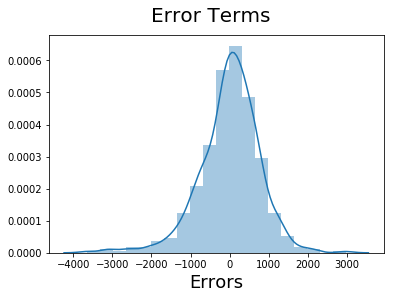

In [54]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

##### Checking the linear relationship between the independent and dependent variables

Considering independent variable windspeed and assuming the rest all are constant. Plotting the regression line between Windspeed and dependent variable cnt. (As this is the major assumption of linear regression)

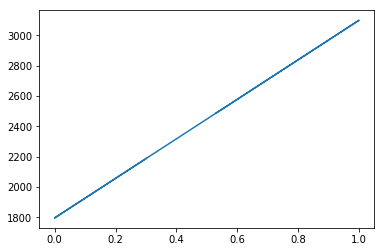

In [55]:
plt.plot(X_train_rfe.windspeed, 1795.3045 + 1303.7822*X_train_rfe.windspeed)
plt.show()

### Making Predictions

##### Applying the scaling on the test sets

In [56]:
num_vars = ['temp','atemp','hum','windspeed']
df_test[num_vars] = scaler.transform(df_test[num_vars])

##### Dividing into X_test and y_test

In [57]:
y_test = df_test.pop('cnt')
X_test = df_test

#### Now using model to make predictions.

In [58]:
X_test_new = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [59]:
y_pred = lm_sm.predict(X_test_new)

### Model Evaluation

##### Plotting y_test and y_pred to understand the spread

Text(0,0.5,'y_pred')

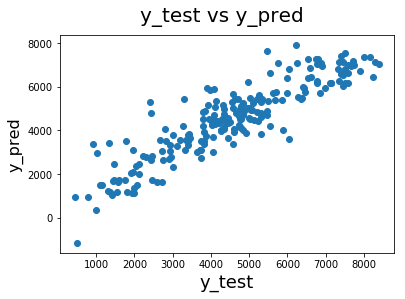

In [60]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)             
plt.xlabel('y_test', fontsize = 18)                        
plt.ylabel('y_pred', fontsize = 16)  

##### Finding the r2 and adjusted r2 of the predicted values

In [61]:
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_pred)
print('the value of r_squared : {}'.format(r_squared))

adj_r2 = (1 - (1 - r_squared) * ((X_test_new.shape[0] - 1) / (X_test_new.shape[0] - X_test_new.shape[1] - 1)))
print('the value of adjusted r_squared : {}'.format(adj_r2))

the value of r_squared : 0.8078366191055721
the value of adjusted r_squared : 0.7956506486098279


We can see that r2 and adjusted r2 are very close to expected values 0.84 and 0.837 respectively.

### Best Model

We can see that the equation of our best fitted line is:

$ cnt = 1795.3045 + 4280.5460 \times temp - 1303.7822 \times windspeed - 575.5844 \times spring + 407.5930 \times summer + 739.6215 \times winter + 2032.2499 \times 2019 - 425.1637 \times jul + 641.8260 \times sep + 578.6903 \times sat - 475.7598 \times working - 721.4186 \times cloudy - 2514.0730 \times light rain $


### The factors affecting the demand for these shared bikes in the market are,
- The variables that are significant in predicting the demands are temp, 2019, winter, sept, sat and summer.
- The variables tempature, seasons (majorly winter and summer), saturday and september have major impact on the share bikes count.

### The management can strategise by concentrating on below things,
- The management can make effort to increase the share bikes during working days and all through the week.
- They can also make an effort to increase the demand during other months throughout the year when it is mostly clear or cloudy.
